In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data/Covid19 data/Covid real data.csv')
df

,Temperature,Cough,Pulse Rate,SPO2,Status
0,35.5,1,115,91,Covid
1,35.6,1,88,80,Covid
2,35.2,1,78,95,Covid
3,35.3,0,102,97,Covid
4,36.1,1,130,96,Covid
...,...,...,...,...,...
261,36.0,0,88,99,Healthy
262,36.0,0,95,87,Healthy
263,36.2,0,108,99,Healthy
264,35.1,0,92,100,Healthy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  266 non-null    float64
 1   Cough        266 non-null    int64  
 2   Pulse Rate   266 non-null    int64  
 3   SPO2         266 non-null    int64  
 4   Status       266 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 10.5+ KB


In [5]:
df.Status[df.Status == 'Covid'] = 1
df.Status[df.Status == 'Healthy'] = 0
df

<ipython-input-5-7a2e0f2d67ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[df.Status == 'Covid'] = 1
<ipython-input-5-7a2e0f2d67ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Status[df.Status == 'Healthy'] = 0


,Temperature,Cough,Pulse Rate,SPO2,Status
0,35.5,1,115,91,1
1,35.6,1,88,80,1
2,35.2,1,78,95,1
3,35.3,0,102,97,1
4,36.1,1,130,96,1
...,...,...,...,...,...
261,36.0,0,88,99,0
262,36.0,0,95,87,0
263,36.2,0,108,99,0
264,35.1,0,92,100,0


In [6]:
df['Status'].value_counts()

1    194
0     72
Name: Status, dtype: int64

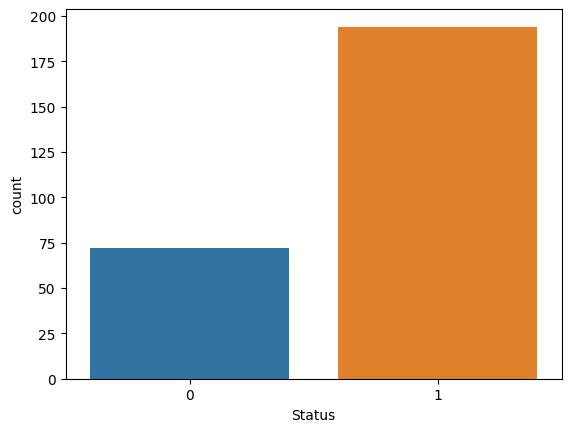

In [7]:
sns.countplot(x="Status",data=df)
plt.show()

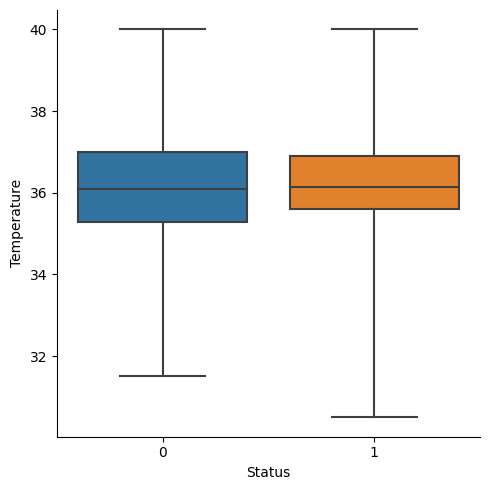

In [8]:
sns.catplot(x="Status",y="Temperature",data=df,kind="box",whis=[0,100])
plt.show()

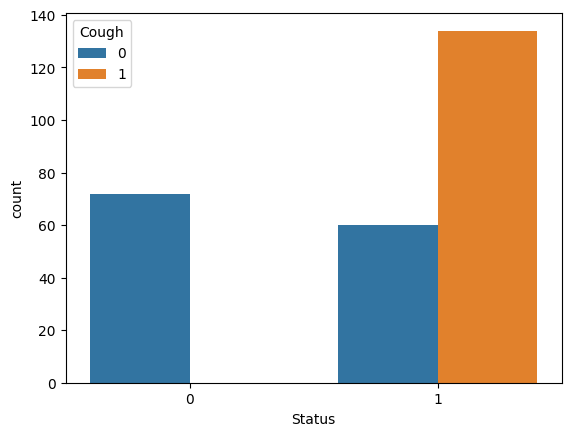

In [9]:
sns.countplot(x="Status",data=df,hue="Cough")
plt.show()

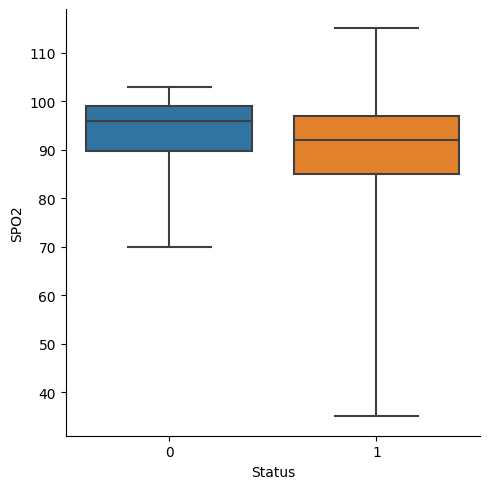

In [10]:
sns.catplot(x="Status",y="SPO2",data=df,kind="box",whis=[0,100])
plt.show()

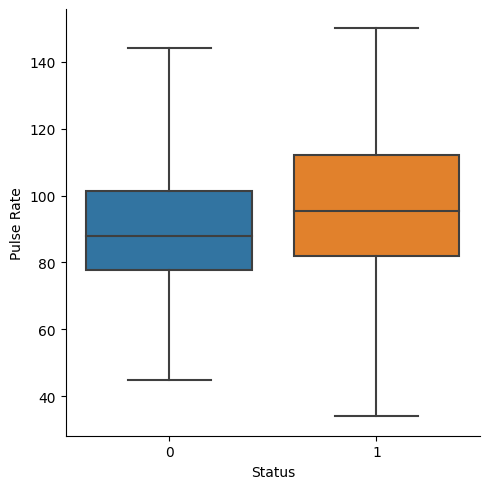

In [11]:
sns.catplot(x="Status",y="Pulse Rate",data=df,kind="box",whis=[0,100])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X=df[['Temperature','Cough','Pulse Rate','SPO2']]
y=df['Status'].astype('int')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=45)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an instance of the model
rfc = RandomForestClassifier()

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the training data
y_train_pred = rfc.predict(X_train)

# Predict on the test data
y_test_pred = rfc.predict(X_test)

# Compute accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Compute classification error, precision, recall, F1 score, sensitivity, and specificity
classification_error = 1 - test_accuracy
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1 = 2 * precision * recall / (precision + recall)

# Print the performance metrics
print("Classification Error:", classification_error)
print("Precision:", precision)
print("Recall/Sensitivity:", recall)
print("F1 score:", f1)
print("Train Accuracy RFC:", train_accuracy)
print("Test Accuracy RFC:", test_accuracy)


Classification Error: 0.17757009345794394
Precision: 0.8888888888888888
Recall/Sensitivity: 0.8780487804878049
F1 score: 0.8834355828220859
Train Accuracy RFC: 1.0
Test Accuracy RFC: 0.822429906542056


Classification Error: 0.17757009345794394
Precision: 0.8705882352941177
Recall/Sensitivity: 0.9024390243902439
F1 score: 0.8862275449101796
Train Accuracy RFC: 1.0
Test Accuracy RFC: 0.822429906542056
[[14 11]
 [ 8 74]]


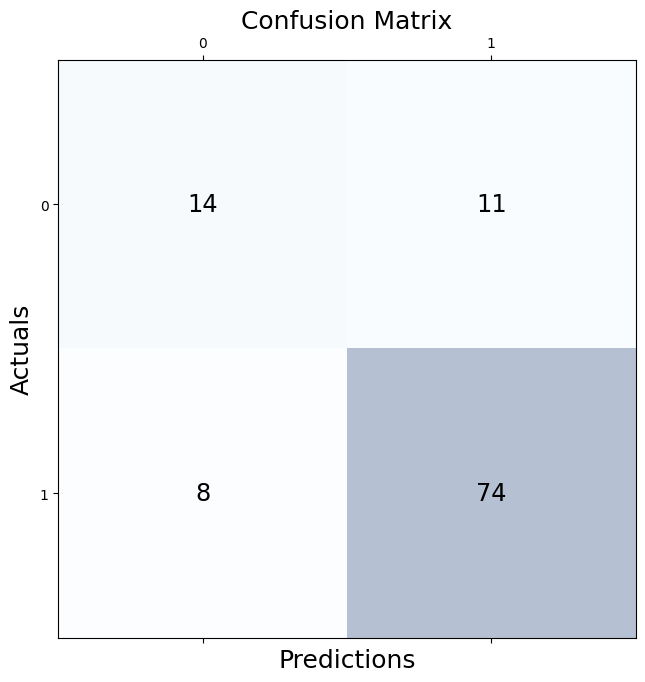

In [15]:
rfc_final = RandomForestClassifier(max_depth = 10, max_features = 1, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rfc_final.fit(X_train,y_train)

# Predict on the training data
y_train_pred = rfc_final.predict(X_train)

# Predict on the test data
y_test_pred = rfc_final.predict(X_test)

# Compute accuracy on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Compute classification error, precision, recall, F1 score, sensitivity, and specificity
classification_error = 1 - test_accuracy
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1 = 2 * precision * recall / (precision + recall)

# Print the performance metrics
print("Classification Error:", classification_error)
print("Precision:", precision)
print("Recall/Sensitivity:", recall)
print("F1 score:", f1)
print("Train Accuracy RFC:", train_accuracy)
print("Test Accuracy RFC:", test_accuracy)
print(cm)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
input_data=(35,0,88,80)
input_data_as_numpy_array=np.asarray(input_data)
reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=rfc_final.predict(reshape)

print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
from joblib import dump

In [24]:
dump(rfc_final, '/content/sample_data/final_model.joblib')

['/content/sample_data/final_model.joblib']